In [225]:
import numpy as np
from numpy.linalg import inv as inv
from numpy.linalg import pinv as pinv
import matplotlib.pyplot as plt
from scipy.special import comb as comb

t = {'o': 0.00001, 'm': 2, 'f': 5.00001} # 0.0001 taken to avoid inversion errors.

# CONSTRAINTS

# NOTE1: Set the following statement to False if you don't want
# to use the additional custom constraint of [v @ cookie point = 0]
# Question a and b
add_cnt_qa = False
add_cnt_qb = False

# Added custom constraint: velocity at cookie point should be zero.
cnts = {'t_o':{'x': 3, 'y' : 0  , 'xdot': 0, 'ydot': 0},
        't_m':{'x': 1, 'y' : 2.5, 'xdot': 0, 'ydot': 0},
        't_f':{'x': 9, 'y' : 5  , 'xdot': 0, 'ydot': 0}}

# Question (a) explanation:
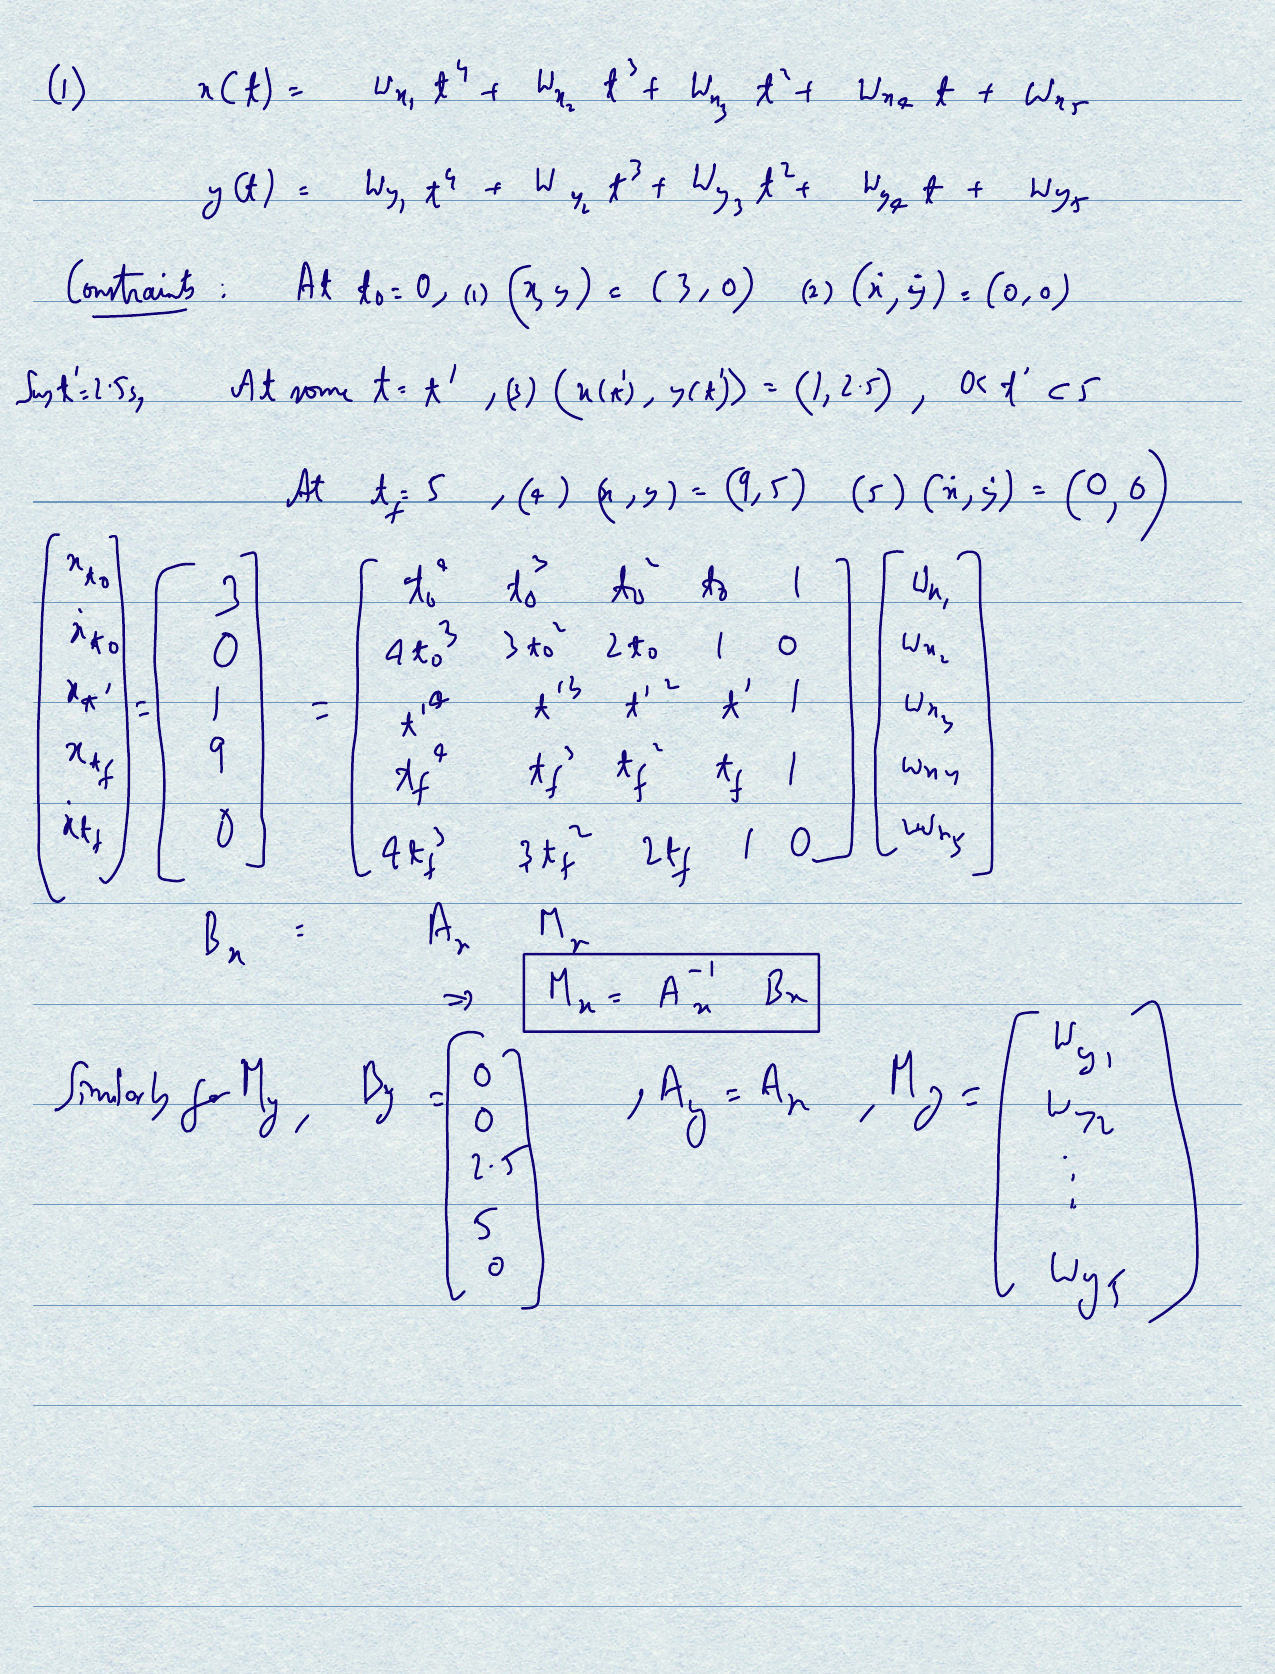

# Question (a) code:

In [226]:
# Vectorized code. Proceed accordingly.
# dim = either x or y (string)

if not add_cnt_qa:
    B = lambda dim: np.array([cnts['t_o'][dim],cnts['t_o'][dim+'dot'],
                              cnts['t_m'][dim],
                              cnts['t_f'][dim],cnts['t_f'][dim+'dot']])
else:# With extra constraint
    B = lambda dim: np.array([cnts['t_o'][dim],cnts['t_o'][dim+'dot'],
                              cnts['t_m'][dim],cnts['t_m'][dim+'dot'],
                              cnts['t_f'][dim],cnts['t_f'][dim+'dot']])

A_t = lambda t: np.array([t**4, t**3, t**2, t, 1]) # 4th degree polynomial
A_tdot = lambda t: np.array([4*t**3, 3*t**2, 2*t, 1, 0]) # Polynomial's Derivative
A_tdotdot = lambda t: np.array([12*t**2, 6*t**1, 2, 0, 0]) # Well, self-explanatory.

if not add_cnt_qa:
    A = lambda dim, t: np.array([A_t(t['o']),
                                 A_tdot(t['o']),
                                 A_t(t['m']),
                                 A_t(t['f']),
                                 A_tdot(t['f'])])
else:# With extra constraint
    A = lambda dim, t: np.array([A_t(t['o']),
                                 A_tdot(t['o']),
                                 A_t(t['m']),
                                 A_tdot(t['m']),
                                 A_t(t['f']),
                                 A_tdot(t['f'])])
    


In [227]:
# Calculating the weights:
if not add_cnt_qa:
    M_x, M_y = inv(A('x', t)) @ B('x'), inv(A('y', t)) @ B('y')
else:# Pseudo inverse:
    M_x = inv(A('x', t).T @ A('x', t)) @ A('x', t).T @ B('x')
    M_y = inv(A('y', t).T @ A('y', t)) @ A('y', t).T @ B('y')

# Question (a) results

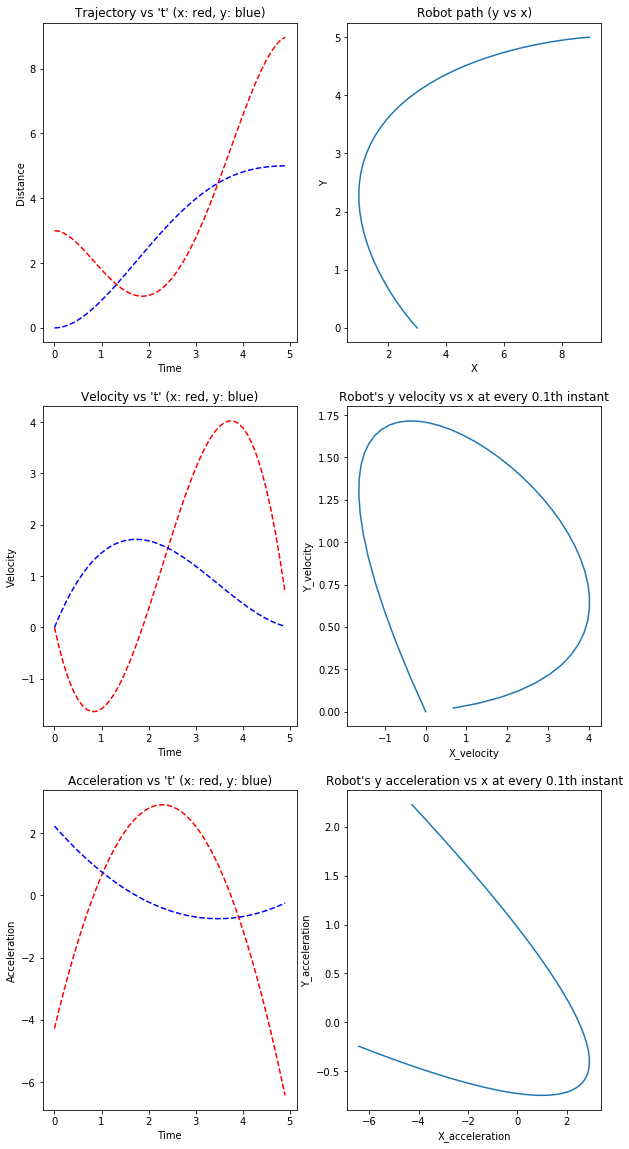

In [228]:
t_div = np.arange(0.00001, 5.00001, 0.1)

plt.figure(figsize=(10, 20))

plt.subplot(321)
plt.ylabel('Distance')
plt.xlabel('Time')
plt.title('Trajectory vs \'t\' (x: red, y: blue)')
plt.plot(t_div, A_t(t_div).T @ M_x, 'r--', t_div, A_t(t_div).T @ M_y, 'b--')

plt.subplot(322)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Robot path (y vs x)')
plt.plot(A_t(t_div).T @ M_x, A_t(t_div).T @ M_y)

plt.subplot(323)
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.title('Velocity vs \'t\' (x: red, y: blue)')
plt.plot(t_div, A_tdot(t_div).T @ M_x, 'r--', t_div, A_tdot(t_div).T @ M_y, 'b--')

plt.subplot(324)
plt.xlabel('X_velocity')
plt.ylabel('Y_velocity')
plt.title('Robot\'s y velocity vs x at every 0.1th instant')
plt.plot(A_tdot(t_div).T @ M_x, A_tdot(t_div).T @ M_y)

plt.subplot(325)
plt.ylabel('Acceleration')
plt.xlabel('Time')
plt.title('Acceleration vs \'t\' (x: red, y: blue)')
plt.plot(t_div, A_tdotdot(t_div).T @ M_x, 'r--', t_div, A_tdotdot(t_div).T @ M_y, 'b--')

plt.subplot(326)
plt.xlabel('X_acceleration')
plt.ylabel('Y_acceleration')
plt.title('Robot\'s y acceleration vs x at every 0.1th instant')
plt.plot(A_tdotdot(t_div).T @ M_x, A_tdotdot(t_div).T @ M_y)

plt.show()

# Question (b) Explanation


# Question (b) Code

In [229]:
# Vectorized code. Proceed accordingly.
# dim = either x or y (string)
if not add_cnt_qb:
    B = lambda dim: np.array([cnts['t_o'][dim],cnts['t_o'][dim+'dot'],
                              cnts['t_m'][dim],
                              cnts['t_f'][dim],cnts['t_f'][dim+'dot']])
else:# With extra constraint
    B = lambda dim: np.array([cnts['t_o'][dim],cnts['t_o'][dim+'dot'],
                              cnts['t_m'][dim],cnts['t_m'][dim+'dot'],
                              cnts['t_f'][dim],cnts['t_f'][dim+'dot']])

term = lambda n,i,t: comb(n,i) * ((t/5)**i) * ((1 - t/5)**(n-i))
term_dot = lambda n,i,t: comb(n,i) * (((i)  *  ((t/5)**(i-1))  * ((1 - t/5)**(n-i))) +
                                      ((n-i) *  ((t/5)**(i))  * ((1 - t/5)**(n-i-1))))
term_dot2 = lambda n,i,t: comb(n,i) * (((i) * (i-1)  *  ((t/5)**(i-2))  * ((1 - t/5)**(n-i)))
                                    + ((n-i) * (n-i-1)* ((t/5)**(i))  * ((1 - t/5)**(n-i-2)))
                                    + (2 * (i) * (n-i)* ((t/5)**(i-1))  * ((1 - t/5)**(n-i-1))))

C_t = lambda t: np.array([term(5,0,t),term(5,1,t),term(5,2,t),
                          term(5,3,t),term(5,4,t),term(5,5,t)])
C_tdot = lambda t: np.array([term_dot(5,0,t),term_dot(5,1,t),term_dot(5,2,t),
                          term_dot(5,3,t),term_dot(5,4,t),term_dot(5,5,t)])
C_tdotdot = lambda t: np.array([term_dot2(5,0,t),term_dot2(5,1,t),term_dot2(5,2,t),
                          term_dot2(5,3,t),term_dot2(5,4,t),term_dot2(5,5,t)])

if not add_cnt_qb:
    C = lambda dim, t: np.array([C_t(t['o']),
                                 C_tdot(t['o']),
                                 C_t(t['m']),
                                 C_t(t['f']),
                                 C_tdot(t['f'])])
else:# With extra constraint
    C = lambda dim, t: np.array([C_t(t['o']),
                                 C_tdot(t['o']),
                                 C_t(t['m']),
                                 C_tdot(t['m']),
                                 C_t(t['f']),
                                 C_tdot(t['f'])])



In [230]:
# Calculating the weights:
# CHECK 1: does using pinv/pseudoinv make sense? MORE VARIABLES, LESS EQNS HERE.
N_x = inv(C('x', t).T @ C('x', t)) @ C('x', t).T @ B('x')
N_y = inv(C('y', t).T @ C('y', t)) @ C('y', t).T @ B('y')

# Question (b) results

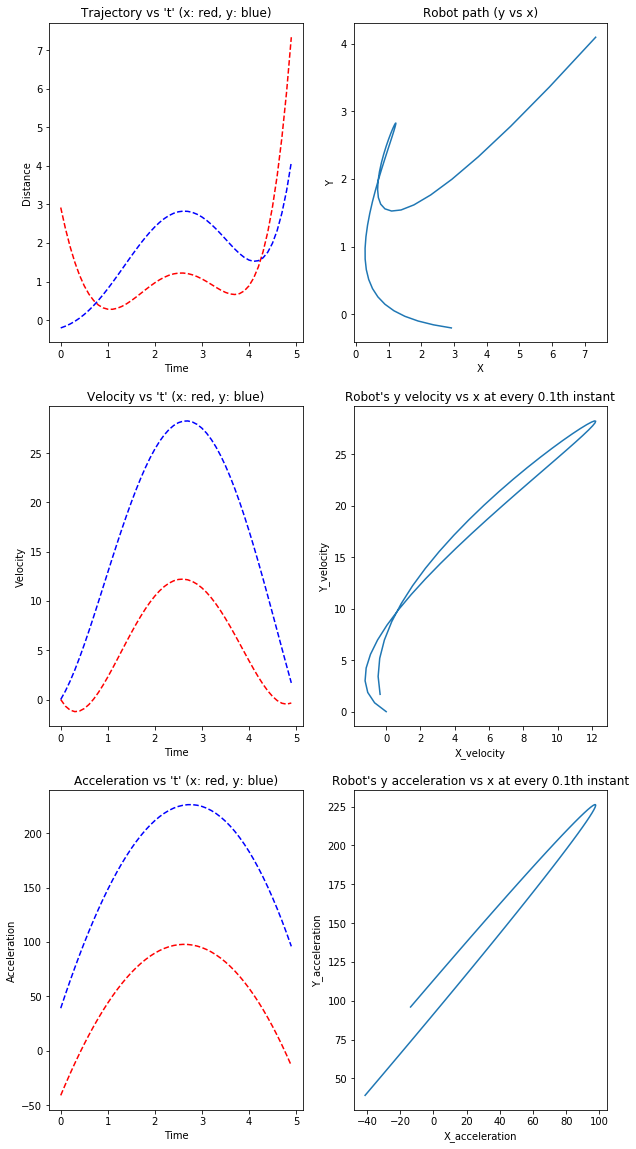

In [231]:
t_div = np.arange(0.00001, 5.00001, 0.1)

plt.figure(figsize=(10, 20))

plt.subplot(321)
plt.ylabel('Distance')
plt.xlabel('Time')
plt.title('Trajectory vs \'t\' (x: red, y: blue)')
plt.plot(t_div, C_t(t_div).T @ N_x, 'r--', t_div, C_t(t_div).T @ N_y, 'b--')

plt.subplot(322)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Robot path (y vs x)')
plt.plot(C_t(t_div).T @ N_x, C_t(t_div).T @ N_y)

plt.subplot(323)
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.title('Velocity vs \'t\' (x: red, y: blue)')
plt.plot(t_div, C_tdot(t_div).T @ N_x, 'r--', t_div, C_tdot(t_div).T @ N_y, 'b--')

plt.subplot(324)
plt.xlabel('X_velocity')
plt.ylabel('Y_velocity')
plt.title('Robot\'s y velocity vs x at every 0.1th instant')
plt.plot(C_tdot(t_div).T @ N_x, C_tdot(t_div).T @ N_y)

plt.subplot(325)
plt.ylabel('Acceleration')
plt.xlabel('Time')
plt.title('Acceleration vs \'t\' (x: red, y: blue)')
plt.plot(t_div, C_tdotdot(t_div).T @ N_x, 'r--', t_div, C_tdotdot(t_div).T @ N_y, 'b--')

plt.subplot(326)
plt.xlabel('X_acceleration')
plt.ylabel('Y_acceleration')
plt.title('Robot\'s y acceleration vs x at every 0.1th instant')
plt.plot(C_tdotdot(t_div).T @ N_x, C_tdotdot(t_div).T @ N_y)

plt.show()

# Question (c)